Data set: https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4

### Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data set into a pandas data frame
iowa_df = pd.read_csv("3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv")

# iowa_df.head(5) # Show the first 5 rows of the dataframe

In [3]:
# printing out unique values of a column
# iowa_df['Race - Ethnicity'].unique()

In [4]:
drop_row_list = ['White -', 'Black -', 'N/A -']

iowa_clean_df = iowa_df[~iowa_df['Race - Ethnicity'].isin(drop_row_list)]

# iowa_na_df = iowa_clean_df.dropna()

In [5]:
features_list = ['Release Type', 'Age At Release ', 'Offense Classification', 'Offense Type', 'Target Population']

features_df = iowa_clean_df[features_list]
labels_df = iowa_clean_df[['Return to Prison']]

features_df

,Release Type,Age At Release,Offense Classification,Offense Type,Target Population
0,Parole,25-34,C Felony,Violent,Yes
1,Discharged – End of Sentence,25-34,D Felony,Property,No
2,Parole,35-44,B Felony,Drug,Yes
3,Parole,25-34,B Felony,Other,Yes
4,Discharged – End of Sentence,35-44,D Felony,Violent,No
...,...,...,...,...,...
26015,Paroled to Detainer - INS,Under 25,C Felony,Violent,Yes
26016,Released to Special Sentence,35-44,C Felony,Violent,No
26017,Parole Granted,25-34,Aggravated Misdemeanor,Public Order,No
26018,Paroled w/Immediate Discharge,25-34,D Felony,Property,Yes


### Ethnicity and Sex Visualization

In [6]:
# gets the ethnicity count and the gender count within each ethnicity group
ethnic_gender_series = iowa_clean_df.groupby(['Race - Ethnicity', 'Sex']).count()['Fiscal Year Released']
ethnic_gender_series

Race - Ethnicity                                 Sex   
American Indian or Alaska Native - Hispanic      Female        8
                                                 Male         12
American Indian or Alaska Native - Non-Hispanic  Female       95
                                                 Male        407
Asian or Pacific Islander - Hispanic             Male          5
Asian or Pacific Islander - Non-Hispanic         Female       21
                                                 Male        171
Black - Hispanic                                 Female        3
                                                 Male         34
Black - Non-Hispanic                             Female      634
                                                 Male       5475
White - Hispanic                                 Female      111
                                                 Male       1411
White - Non-Hispanic                             Female     2463
                                  

In [7]:
# separating list out by male and female to create stacked bar plot
female_count_list = []
male_count_list = []
for i in range(ethnic_gender_series.size):
    idx = i
    if (idx) % 2 == 0:
        male_count_list.append(ethnic_gender_series[idx])
    else:
        female_count_list.append(ethnic_gender_series[idx])
        
print(male_count_list)
print(female_count_list)

female_count_list.insert(2, 0)
print(female_count_list)

[8, 95, 5, 171, 34, 5475, 1411, 15121]
[12, 407, 21, 3, 634, 111, 2463]
[12, 407, 0, 21, 3, 634, 111, 2463]


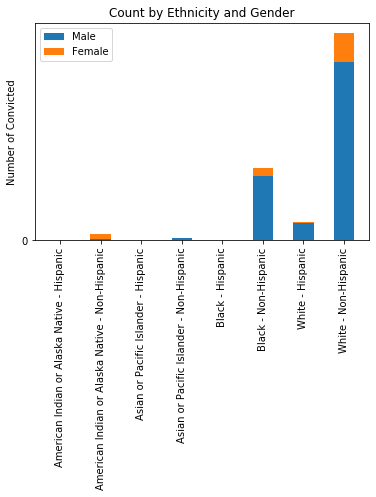

In [8]:
# create the stacked bar plot
width = 0.5
ind = np.arange(8) 

p1 = plt.bar(ind, male_count_list, width)
p2 = plt.bar(ind, female_count_list, width, bottom=male_count_list)

ethnic_list = ['American Indian or Alaska Native - Hispanic', \
               'American Indian or Alaska Native - Non-Hispanic', \
               'Asian or Pacific Islander - Hispanic', \
               'Asian or Pacific Islander - Non-Hispanic', \
               'Black - Hispanic', \
               'Black - Non-Hispanic', \
               'White - Hispanic', \
               'White - Non-Hispanic']


# ethnic_list = iowa_clean_df['Race - Ethnicity'].unique()

plt.title('Count by Ethnicity and Gender')
plt.ylabel('Number of Convicted')
plt.xticks(ind, ethnic_list, rotation=90)
plt.yticks(np.arange(0, 1000, 1000))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.show()

## count of recidivism in each ethnic group

split data set on race
- before train eliminate race column
- proxy variables that predict for race
- treat race as independent variable
  - predict race
- blindness != feature is gone

protected attributes

### Neural Network reference:
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6 <br>
https://towardsdatascience.com/inroduction-to-neural-networks-in-python-7e0b422e6c24

In [9]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights    = np.random.rand(self.input.shape[1], 1)
        self.y          = y
        
    # activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    
    # calculating predicted value y_hat
    def feedforward(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weights))
        
    # used to propogate errors back and update weights
    def backpropagation(self):
        error = self.y - self.layer1
        delta = error * self.sigmoid(self.layer1, deriv=True)
        self.weights += np.dot(self.input.T, delta)

    # train the neural net for 250 iterations
    def train(self, epochs=250):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feedforward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        count = 0
        list1=[]
        for pred in prediction:
            if pred[0] == 0.:
                count += 1
            if pred[0] not in list1:
                list1.append(pred[0])
        print(count, len(prediction))
        return prediction, list1

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

features_matrix = features_df
labels_matrix = labels_df

# creating the binarized label for each unique value
enc = preprocessing.LabelBinarizer()
categorical_feature_mask = features_matrix.dtypes==object
categorical_cols = features_matrix.columns[categorical_feature_mask].tolist()
features_matrix = features_matrix.replace(np.nan, -1)

for entry in categorical_cols:
    features_matrix.reset_index(drop=True, inplace=True)
    enc.fit(features_matrix[entry].astype(str))
    transformed = enc.transform(features_matrix[entry].astype(str))
    df = pd.DataFrame(transformed)
    print(df)
    features_matrix = pd.concat([features_matrix, df], axis=1).drop([entry], axis=1)

# encode labels_df strings
labels_matrix.replace({'Yes': 1, 'No': 0})

# split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(features_matrix, labels_matrix, test_size=0.2, random_state=1)
# features_matrix
features_matrix

       0  1  2  3  4  5  6  7  8  9  10  11  12
0      0  0  0  0  1  0  0  0  0  0   0   0   0
1      0  0  1  0  0  0  0  0  0  0   0   0   0
2      0  0  0  0  1  0  0  0  0  0   0   0   0
3      0  0  0  0  1  0  0  0  0  0   0   0   0
4      0  0  1  0  0  0  0  0  0  0   0   0   0
...   .. .. .. .. .. .. .. .. .. ..  ..  ..  ..
25996  0  0  0  0  0  0  1  0  0  0   0   0   0
25997  0  0  0  0  0  0  0  0  0  0   0   1   0
25998  0  0  0  0  0  1  0  0  0  0   0   0   0
25999  0  0  0  0  0  0  0  0  0  0   1   0   0
26000  0  0  0  0  0  0  0  0  1  0   0   0   0

[26001 rows x 13 columns]
       0  1  2  3  4
0      1  0  0  0  0
1      1  0  0  0  0
2      0  1  0  0  0
3      1  0  0  0  0
4      0  1  0  0  0
...   .. .. .. .. ..
25996  0  0  0  0  1
25997  0  1  0  0  0
25998  1  0  0  0  0
25999  1  0  0  0  0
26000  0  1  0  0  0

[26001 rows x 5 columns]
       0  1  2  3  4  5  6  7  8  9  10  11  12  13  14
0      0  0  0  1  0  0  0  0  0  0   0   0   0   0   0
1      

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,0,1,2,3,4,0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
25997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25998,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [13]:
# create neural network   
NN = NeuralNetwork(x_train, y_train)
# print(x_train, y_train)

# train neural network
NN.train(250)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
recidivism_pred, list1 = NN.predict(x_test)
print(list1)

In [ ]:
recidivism_pred

### Decision Tree

references: https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics

# le = preprocessing.LabelEncoder()
enc = preprocessing.LabelBinarizer()
copy = features_df
categorical_feature_mask = copy.dtypes==object
categorical_cols = copy.columns[categorical_feature_mask].tolist()
copy = copy.replace(np.nan, -1)
# copy = copy.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

for entry in categorical_cols:
    copy.reset_index(drop=True, inplace=True)
    enc.fit(copy[entry].astype(str))
    transformed = enc.transform(copy[entry].astype(str))
#     print(transformed.shape, copy.shape, "Unqiues:", copy[entry].unique() )
    df = pd.DataFrame(transformed)
    copy = pd.concat([copy, df], axis=1).drop([entry], axis=1)
#     print("New size:",copy.shape)

x_train, x_test, y_train, y_test = train_test_split(copy, labels_df, test_size=0.2, random_state=3)
index = -1;
max = -1;
for i in range(1,25):
    dt = tree.DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train, y_train)
    y_hat = dt.predict(x_test)
    if (metrics.accuracy_score(y_test, y_hat) > max):
        max = metrics.accuracy_score(y_test, y_hat)
        index = i

dt = tree.DecisionTreeClassifier(max_depth=index)
dt.fit(x_train, y_train)
y_hat = dt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))

copy

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

print(features_df.columns)
print(type(features_df))
features_df["Release Type"]=features_df["Release Type"].astype("category")
features_df["Age At Release "]=features_df["Age At Release "].astype("category")
features_df["Offense Classification"]=features_df["Offense Classification"].astype("category")
features_df["Offense Type"]=features_df["Offense Type"].astype("category")
features_df["Target Population"]=features_df["Target Population"].astype("category")
labels_df["Return to Prison"]=labels_df["Return to Prison"].astype("category")
le = preprocessing.LabelEncoder()
#print(type(features_df["Release Type"]))
features_df["Release Type"] = features_df["Release Type"].cat.codes
#features_df["Release Age "] = features_df["Release Age "].cat.codes
features_df['Age At Release '] = features_df['Age At Release '].cat.codes
features_df["Offense Classification"] = features_df["Offense Classification"].cat.codes
features_df["Offense Type"] = features_df["Offense Type"].cat.codes
features_df["Target Population"] = features_df["Target Population"].cat.codes 
le.fit(labels_df["Return to Prison"])
labels_df["Return to Prison"] = labels_df["Return to Prison"].cat.codes
print(labels_df)


x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.25, random_state=0)

print(x)
print("done")
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)





